In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]

In [57]:
print(inputData.shape)
print(y.shape)

(70000, 784)
(70000,)


In [58]:
inputData = inputData / 255
nDigits = 10

In [59]:
yOneHot= np.zeros([y.shape[0], nDigits])
for i in range(y.shape[0]):
    yOneHot[i, int(y[i])] = 1

y = yOneHot

In [60]:
print(y.shape)

(70000, 10)


In [61]:
m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m, :].reshape(m, nDigits), y[m:, :].reshape(m_test, nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]
np.random.seed(1002)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


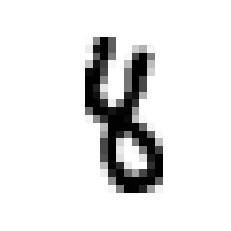

In [62]:
i = 7000
plt.imshow(InputData_train[i, :].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis("off")
print(y_train[i, :])

In [63]:
# Define Activation, loss, and their derivative
def sigmoid(x):
    return 1 /  (1 + np.exp(-x)) 

In [64]:
def sigmoid_derivative(z):
    return z * (1 - z)

In [65]:
def reLu(x):
    return np.maximum(0, x)

In [66]:
def reLu_derivative(x):
    return 0.5 * (np.sign(x) + 1) # ReLu derivative is either 0 or 1

In [67]:
def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = - (1 / m) * L_sum
    return L

In [68]:
def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis = 0)

In [70]:
def CE_softmax_derivative(output, ideal_output):
    return output - ideal_output

In [75]:
inputDim = InputData_train.shape[1]
nHidden = 64
learning_rate = 1
weight_decay = 0.001

W1 = 0.01 * np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01 * np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))
    
inputData = InputData_train
y = y_train

Epoch 0 cost:  2.3036191305608402
Epoch 10 cost:  2.301325888177699
Epoch 20 cost:  2.301178821082678
Epoch 30 cost:  2.3011615580280473
Epoch 40 cost:  2.3011594725981657
Epoch 50 cost:  2.301159211673051
Epoch 60 cost:  2.3011591779134224
Epoch 70 cost:  2.301159173416282
Epoch 80 cost:  2.301159172802673
Epoch 90 cost:  2.3011591727173397


Text(0, 0.5, 'Training loss')

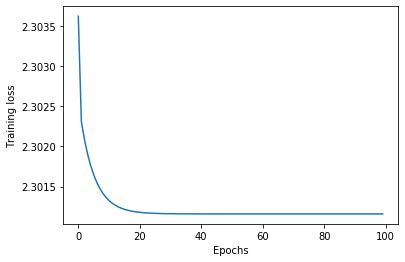

In [76]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):

    Z1 = np.matmul(W1, inputData.T) + b1
    A1 = reLu(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    # backpropagation using chain rule
    dZ2 = CE_softmax_derivative(A2, y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis = 1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * reLu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay + W1
    b1 -= learning_rate * db1

    if(i % 10 == 0):
        print("Epoch", i, "cost: ", cost)

plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training loss')


In [77]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = reLu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis = 0)
labels = np.argmax(y_test.T, axis = 0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[   0    0    0    0    0    0    0    0    0    0]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.20     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00   